## Week 1: End of the week exercises

The end of the week exercise contains 2 datasets you should try to analyse yourself, following the appropriate guidelines. The concepts you've already covered in the previous notebooks, so you should use the opportunity to strengthned your understanding.


### Aims
1. Perform initial data exploration
2. Apply the covered dataframe functions
3. Create suitable charts based on dataset characteristics


### Glasgow Airport Passenger Dataset
The following dataset shows number of passengers flying from Glasgow airport on a montly basis. The total number of passengers is split depending on the type of flight (scheduled vs charter).Attempt to structure your work as follows: 
1. Initial data exploration: answering simple questions about the dataset and exploring the contents of the dataframe

2. Diving into the data: performing operations on the dataframe in order to answer further questions

3. Plots: Choosing the right plot based on the charasteristics of the dataframe <br>
    

In [2]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt


### Step 1
First things first: we need to read our csv file into a dataframe object, just as we've been doing in previous notebooks. 

In [3]:
dataAirport = pd.read_csv("airport_data.csv", sep=',')

Now it's time to explore the data. Try to answer the following questions: 

1. How many rows and columns do we have in our dataAirport dataframe?
2. What are the columns of the dataframe? 
3. What are the countries people are flying to? (only unique elements)
4. What are the regions people are flying to? (only unique elements)
5. What's the maximum amount of passengers over the year flying to a country? Which country is it? 

In [4]:
#question1: 
print (dataAirport.shape)

(682, 15)


Expected output: (682, 15)

In [5]:
#question2: 
print (dataAirport.columns)

Index(['rundate', 'reporting_period', 'foreign_region', 'foreign_country',
       'UK_airport', 'foreign_airport', 'this_month_total_pax',
       'this_month_schedueld_pax', 'this_month_charter_pax',
       'last_month_total_pax', 'last_month_scheduled_pax',
       'last_month_charter_pax', 'percent_change', 'Month', 'Year'],
      dtype='object')


Expected output: 

Index(['rundate', 'reporting_period', 'foreign_region', 'foreign_country',
       'UK_airport', 'foreign_airport', 'this_month_total_pax',
       'this_month_schedueld_pax', 'this_month_charter_pax',
       'last_month_total_pax', 'last_month_scheduled_pax',
       'last_month_charter_pax', 'percent_change', 'Month', 'Year'],
      dtype='object')

In [6]:
#question3:
#HINT: You may want to use the method unique here
#print (dataAirport['foreign_country'].unique())

Expected output: 
['AUSTRIA' 'BARBADOS' 'CANADA' 'CAPE VERDE ISLANDS' 'CUBA' 'CYPRUS'
 'DENMARK' 'EGYPT' 'FRANCE' 'GERMANY' 'ICELAND' 'IRISH REPUBLIC' 'ITALY'
 'MEXICO' 'NETHERLANDS' 'NORWAY' 'PORTUGAL(EXCLUDING MADEIRA)'
 'PORTUGAL(MADEIRA)' 'SPAIN' 'SPAIN(CANARY ISLANDS)' 'SWITZERLAND'
 'TUNISIA' 'TURKEY' 'UNITED ARAB EMIRATES' 'USA' 'SWEDEN' 'MALTA' 'POLAND'
 'REPUBLIC OF SERBIA' 'GREECE' 'BELGIUM' 'BULGARIA' 'HUNGARY' 'MOROCCO'
 'CROATIA' 'DOMINICAN REPUBLIC' 'FAROE ISLANDS' 'FINLAND' 'OIL RIGS'
 'UKRAINE' 'KAZAKHSTAN' 'MACEDONIA' 'RUSSIA' 'LUXEMBOURG']

In [7]:
#question4: 
print (dataAirport['foreign_region'].unique())

['WESTERN EUROPE-EU' 'CARIBBEAN AREA' 'CANADA' 'ATLANTIC OCEAN ISLANDS'
 'CENTRAL AMERICA' 'NORTH AFRICA' 'WESTERN EUROPE-OTHER' 'MIDDLE EAST'
 'UNITED STATES OF AMERICA' 'EASTERN EUROPE-EU' 'OIL RIGS'
 'EASTERN EUROPE -OTHER']


Expected output: 
    ['WESTERN EUROPE-EU' 'CARIBBEAN AREA' 'CANADA' 'ATLANTIC OCEAN ISLANDS'
 'CENTRAL AMERICA' 'NORTH AFRICA' 'WESTERN EUROPE-OTHER' 'MIDDLE EAST'
 'UNITED STATES OF AMERICA' 'EASTERN EUROPE-EU' 'OIL RIGS'
 'EASTERN EUROPE -OTHER']

In [8]:
#question5:
#HINT: use idxmax() instead of max as this will return the index of the max records.
print (dataAirport.loc[dataAirport['this_month_total_pax'].idxmax()])

rundate                      20/11/2013 14:01
reporting_period                       201307
foreign_region              WESTERN EUROPE-EU
foreign_country                         SPAIN
UK_airport                            GLASGOW
foreign_airport             PALMA DE MALLORCA
this_month_total_pax                    44269
this_month_schedueld_pax                17669
this_month_charter_pax                  26600
last_month_total_pax                    41415
last_month_scheduled_pax                14212
last_month_charter_pax                  27203
percent_change                        6.89122
Month                                    July
Year                                     2013
Name: 363, dtype: object


### Step 2
The next part of the investigation process aims to answer further questions we might have about the data.<br>
1.How does the number of passengers vary per month independently of their chosen destination? <br>
2.How does the number of passengers for a particular country change during the year? e.g Spain  <br>


In [9]:
#Number of total passengers per month across all destinations
#Hints: 
#1. use the same approach we used earlier this week, see the notebook on geographical visualisations and potholes
#2. You may find the fuction sum useful (check the glossary)
dataMonth = dataAirport.groupby('Month', sort = False,as_index=False)['this_month_total_pax'].sum()

print (dataMonth)


        Month  this_month_total_pax
0     January                166783
1    February                154758
2       March                206648
3       April                248998
4         May                340629
5        June                446522
6        July                494974
7      August                427711
8   September                433741
9     October                380497
10   November                201924
11   December                190354


In [10]:
#Number of passengers per country for each month

dataCountry = dataAirport[dataAirport['foreign_country'] =='SPAIN']

dataCountry = dataCountry.groupby('Month', sort = False, as_index=False)['this_month_total_pax'].sum()

print (dataCountry)

        Month  this_month_total_pax
0     January                 15110
1    February                 15426
2       March                 23394
3       April                 49564
4         May                 85222
5        June                122981
6        July                128721
7      August                112205
8   September                111213
9     October                 82046
10   November                 26272
11   December                 21017


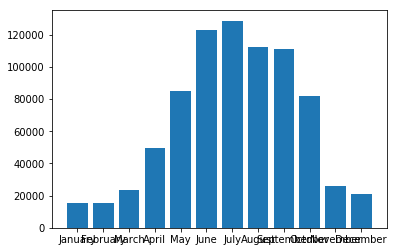

In [11]:
plt.bar(dataCountry['Month'],dataCountry['this_month_total_pax'])
plt.show()

### Step 3
Another important step of the analysis is generating charts. Choose the appropriate visualisation method for the following two tasks. Justify your choice

Create a plot that visualises the variation in the number of passengers to Spain. 

Hint: don't forget to add labels and a title to your plot
    